### Data Analysis

In [11]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import pymongo
import dns
import json

In [13]:
#migration:XqrjZ1iMQ6OTLZFb

user = "migration"
password = "XqrjZ1iMQ6OTLZFb"

In [14]:
client = pymongo.MongoClient("mongodb+srv://" + \
                             user + ":" + password +\
                             "@cluster0-ui9hr.mongodb.net/test?" + \
                             "retryWrites=true&w=majority")

In [15]:
db = client.migration_test
col = db["samples"]

In [16]:
col

Collection(Database(MongoClient(host=['cluster0-shard-00-01-ui9hr.mongodb.net:27017', 'cluster0-shard-00-02-ui9hr.mongodb.net:27017', 'cluster0-shard-00-00-ui9hr.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='Cluster0-shard-0', ssl=True), 'migration_test'), 'samples')

In [17]:
col.count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


1000

In [18]:
x = col.find_one()
print(x) 

{'_id': ObjectId('5e118e62ba2c42ee99033acf'), 'ID': 'ZDY69F3FEQ', 'age': 39, 'gender': 'female', 'profession': {'major': 'Construction and Extraction Occupations', 'branch': 'FirstLine Supervisors of Construction Trades and Extraction Workers'}, 'interest': 'teaching', 'home_address': {'province': 'PN1', 'district': 'Morang', 'MCP': 'Belbari MCP', 'ward': 'Ward 11'}, 'foreign_address': {'country': 'South-Africa', 'ID': 'ZA', 'lat': '-30.559482', 'lon': '22.937506', 'city': 'N'}, 'date_out': '2016.11.16', 'date_return': '2020.2.23', 'fund2invest': {'invetsment sector': '8%', 'tourism and hospitality': '2%', 'animal husbandary': '3%', 'infrastructure': '9%', 'cottage industries': '7%', 'personal service business': '4%', 'retail business': '2%', 'consultancy service': '2%', 'alternative energy': '10%', 'agriculture': '3%', 'total_fund': 5215}, 'remittance': [{'month': 9, 'amount': 100}, {'month': 12, 'amount': 850}, {'month': 5, 'amount': 721}, {'month': 3, 'amount': 288}, {'month': 9, 'a

In [19]:
for item in col.find():
    for item in list(item.keys()):
        print(item)
    break

_id
ID
age
gender
profession
interest
home_address
foreign_address
date_out
date_return
fund2invest
remittance
travell
social_work
personal_view


In [20]:
DATA = []
for item in col.find():
    DATA.append(item)

In [21]:
DATA[0]

{'_id': ObjectId('5e118e62ba2c42ee99033acf'),
 'ID': 'ZDY69F3FEQ',
 'age': 39,
 'gender': 'female',
 'profession': {'major': 'Construction and Extraction Occupations',
  'branch': 'FirstLine Supervisors of Construction Trades and Extraction Workers'},
 'interest': 'teaching',
 'home_address': {'province': 'PN1',
  'district': 'Morang',
  'MCP': 'Belbari MCP',
  'ward': 'Ward 11'},
 'foreign_address': {'country': 'South-Africa',
  'ID': 'ZA',
  'lat': '-30.559482',
  'lon': '22.937506',
  'city': 'N'},
 'date_out': '2016.11.16',
 'date_return': '2020.2.23',
 'fund2invest': {'invetsment sector': '8%',
  'tourism and hospitality': '2%',
  'animal husbandary': '3%',
  'infrastructure': '9%',
  'cottage industries': '7%',
  'personal service business': '4%',
  'retail business': '2%',
  'consultancy service': '2%',
  'alternative energy': '10%',
  'agriculture': '3%',
  'total_fund': 5215},
 'remittance': [{'month': 9, 'amount': 100},
  {'month': 12, 'amount': 850},
  {'month': 5, 'amount':

In [22]:
DF = pd.DataFrame(DATA[10:150])

In [23]:
DF = DF.set_index('ID')

In [24]:
DF.head(3)

,_id,age,date_out,date_return,foreign_address,fund2invest,gender,home_address,interest,personal_view,profession,remittance,social_work,travell
ID,,,,,,,,,,,,,,
478EQ2P144,5e118e62ba2c42ee99033ad9,25,2019.11.6,2025.3.16,"{'country': 'Macedonia-[FYROM]', 'ID': 'MK', '...","{'invetsment sector': '4%', 'tourism and hospi...",male,"{'province': 'PN1', 'district': 'Solukhumbu', ...",novel,"[Around 30 years, over a dozen missed deadline...","{'major': 'Protective Service Occupations', 'b...","[{'month': 7, 'amount': 824}, {'month': 4, 'am...","[{'date': '2008.1.18', 'work': 'work for physi...","[{'date': '2016.2.21', 'place': {'country': 'P..."
0V70UAA47A,5e118e62ba2c42ee99033ada,38,2014.3.13,2022.10.12,"{'country': 'Lebanon', 'ID': 'LB', 'lat': '33....","{'invetsment sector': '2%', 'tourism and hospi...",female,"{'province': 'PN5', 'district': 'Dang', 'MCP':...",movies,"[In this discouraging context, the call for a ...",{'major': 'Construction and Extraction Occupat...,"[{'month': 3, 'amount': 530}, {'month': 10, 'a...","[{'date': '2005.6.20', 'work': 'security plan'...","[{'date': '2013.2.22', 'place': {'country': 'E..."
HB2V6E8959,5e118e62ba2c42ee99033adb,35,2015.6.7,2024.1.10,"{'country': 'Cyprus', 'ID': 'CY', 'lat': '35.1...","{'invetsment sector': '1%', 'tourism and hospi...",female,"{'province': 'PN3', 'district': 'Chitwan', 'MC...",history,"[Yet, having said that, the companies cannot o...","{'major': 'Military Specific Occupations', 'br...","[{'month': 12, 'amount': 125}, {'month': 4, 'a...","[{'date': '2015.7.20', 'work': 'voice against ...","[{'date': '2010.10.26', 'place': {'country': '..."


### Data Processing

1. Drop views
2. Seperate home address [PN,District,MCP,Ward]
3. Seperate Foreign address [country,lat,long,city]
4. Use lambda function $1000 = $1K
5. Create new column [month] with total month duration between data out-date return

#### Data Exploration

1. Age distribution ?
2. Gender and age - correlation?
3. County- gender ? Country- age ?
4. Histogram, bar-plot, ven-diagram ?

#### Data modeling - Machine lerning ( Scikit-learn)

1. Linear-regression, 
2. Classifier

#### Data Visualization ( matplotlib.pyplot, seaborn, Bokeh, plotly(Python-API)) (D3.JS, chart.js)

1. Plot generation

----------

In [25]:
Data = []
k = 0
for item in DATA:
    #print(item.values()) 
    ID = item['ID']
    age = item['age']
    gender = item['gender']
    country = item['foreign_address']['country']
    province = item['home_address']['province']
    district = item['home_address']['district']
    lat = item['foreign_address']['lat']
    lon = item['foreign_address']['lon']
    interest = item['interest']
    profession = item['profession']['branch']
    income = 0
    for t in item['remittance']:
        income = income+t['amount']
        
    
    Data.append({'ID': ID,\
                 "age":age,\
                 "gender":gender,\
                 "country": country,\
                 "lat": lat,\
                 "lon":lon,\
                 "province":province,\
                 "district": district,\
                 "interest": interest,\
                 "profession": profession,\
                 "income": income})
    

In [26]:
DF = pd.DataFrame(Data)
DF = DF.set_index("ID")
DF.head()

,age,country,district,gender,income,interest,lat,lon,profession,province
ID,,,,,,,,,,
ZDY69F3FEQ,39,South-Africa,Morang,female,3152,teaching,-30.559482,22.937506,FirstLine Supervisors of Construction Trades a...,PN1
JKN5K2HA7V,43,Colombia,Dang,female,3966,movies,4.570868,-74.297333,"Criminal Justice and Law Enforcement Teachers,...",PN5
GDF7K4W6O7,26,Norfolk-Island,Kaski,male,2942,poem,-29.040835,167.954712,Fast Food and Counter Workers,PN4
Y47Y1B0093,46,Tunisia,Dadeldhura,female,3869,gardening,33.886917,9.537499,Chefs and Head Cooks,PN7
U88OLXB0WB,48,Saudi-Arabia,Manang,male,1988,gardening,23.885942,45.079162,Bartenders,PN4


In [27]:
Country = DF.groupby('country').count()["age"]
Country

country
Afghanistan                        4
Albania                            1
Algeria                            3
American-Samoa                     4
Andorra                            3
Angola                             4
Anguilla                           1
Antarctica                         4
Antigua-and-Barbuda                4
Argentina                          4
Armenia                            4
Australia                          5
Austria                            4
Azerbaijan                         3
Bahamas                            8
Bahrain                            2
Bangladesh                         4
Barbados                           2
Belarus                            4
Belgium                            5
Belize                             6
Benin                              7
Bermuda                            6
Bhutan                             2
Bolivia                            6
Bosnia-and-Herzegovina             3
Botswana                      

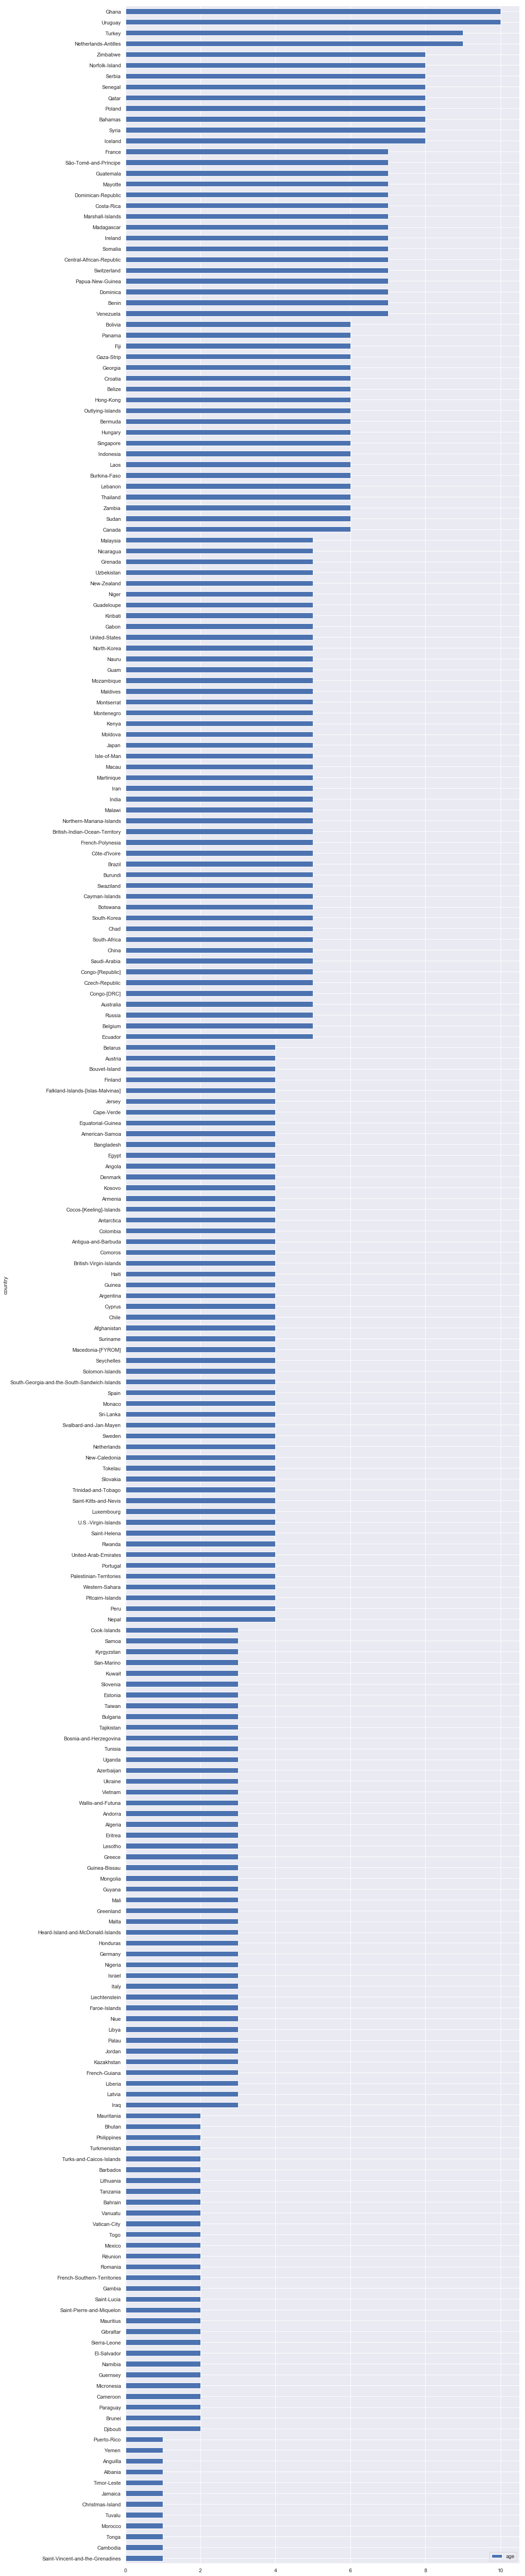

In [28]:
%matplotlib inline
sns.set()
Country = DF.groupby('country').count()['age']
df = pd.DataFrame(Country)
df = df.sort_values('age')
df.plot.barh(figsize = [15,100])

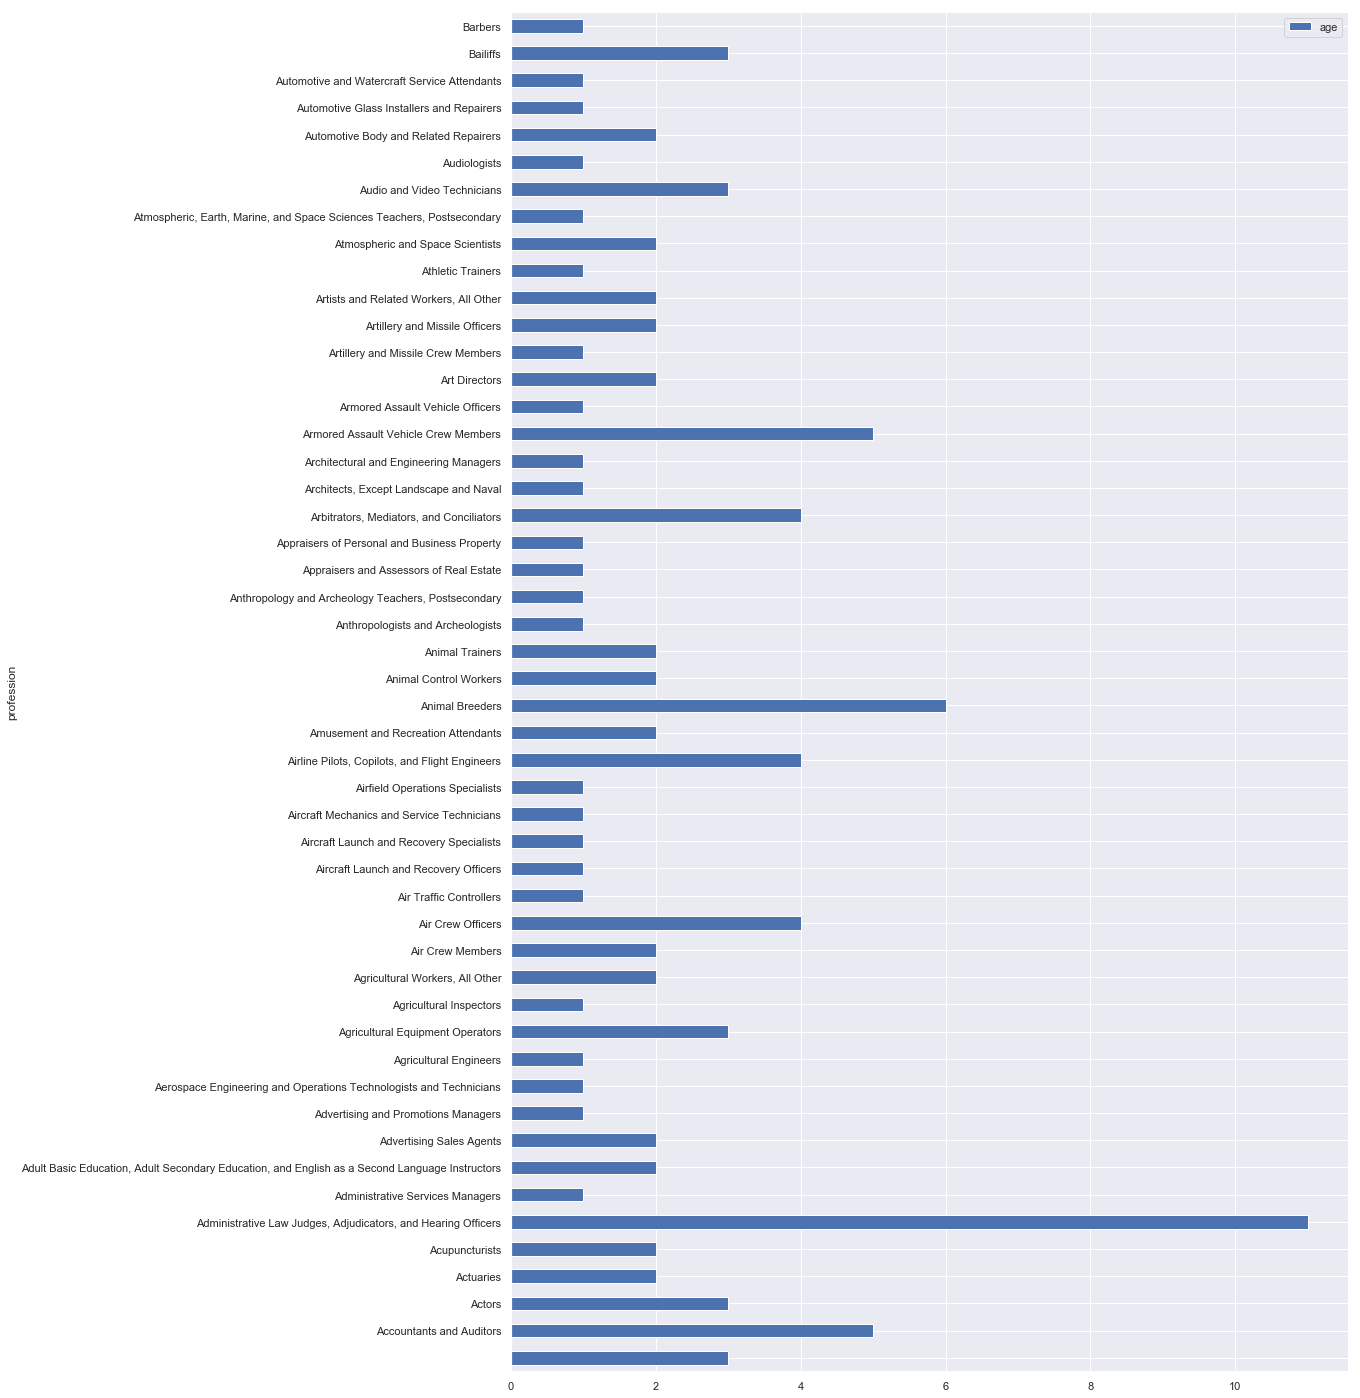

In [29]:
%matplotlib inline
sns.set()
P = DF.groupby('profession').count()['age']
df = pd.DataFrame(P)
#df = df.sort_values('age')
df[0:50].plot.barh(figsize = [15,25])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x1512 with 0 Axes>

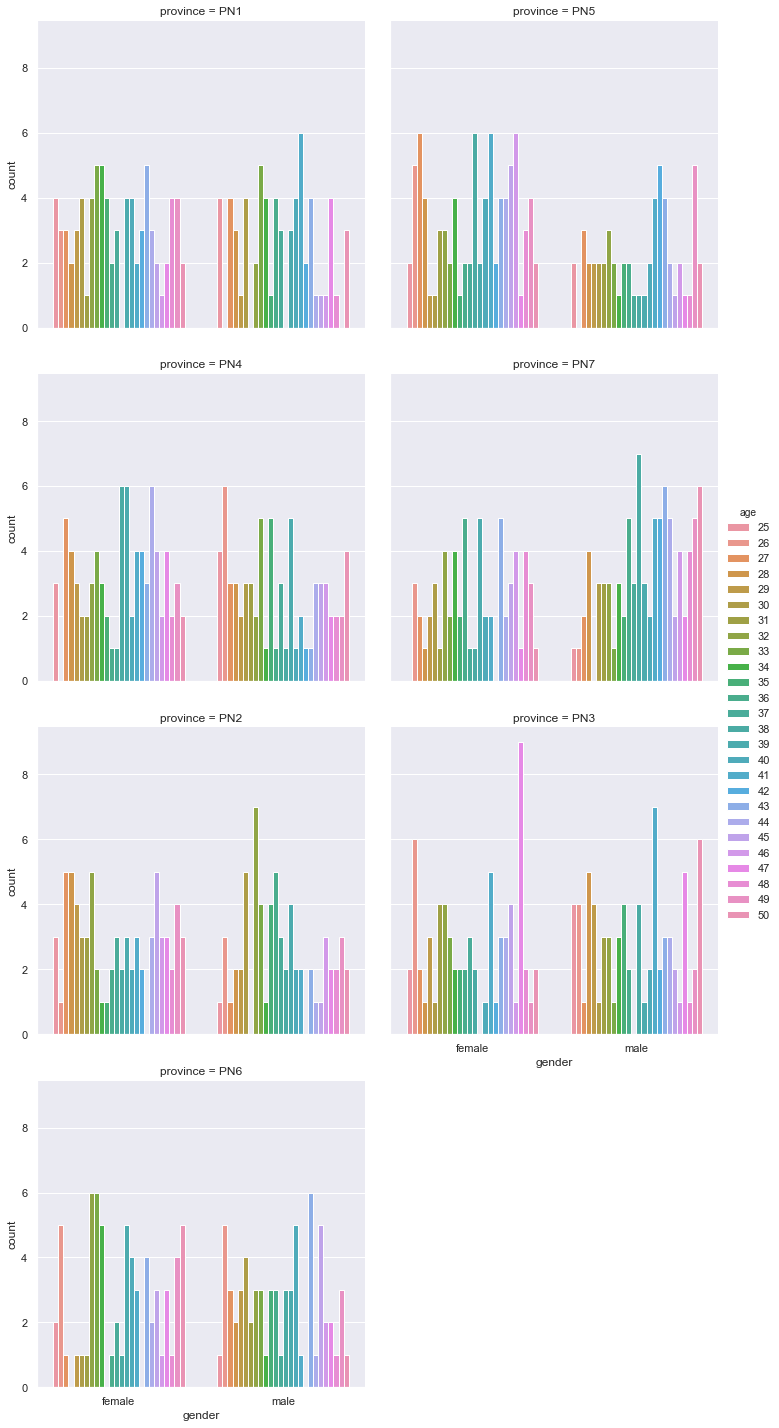

In [30]:
plt.figure(figsize = (16,21))
sns.set(color_codes=True)
sns.factorplot("gender", col="province", data=DF, 
               hue='age', kind="count", col_wrap=2);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1512 with 0 Axes>

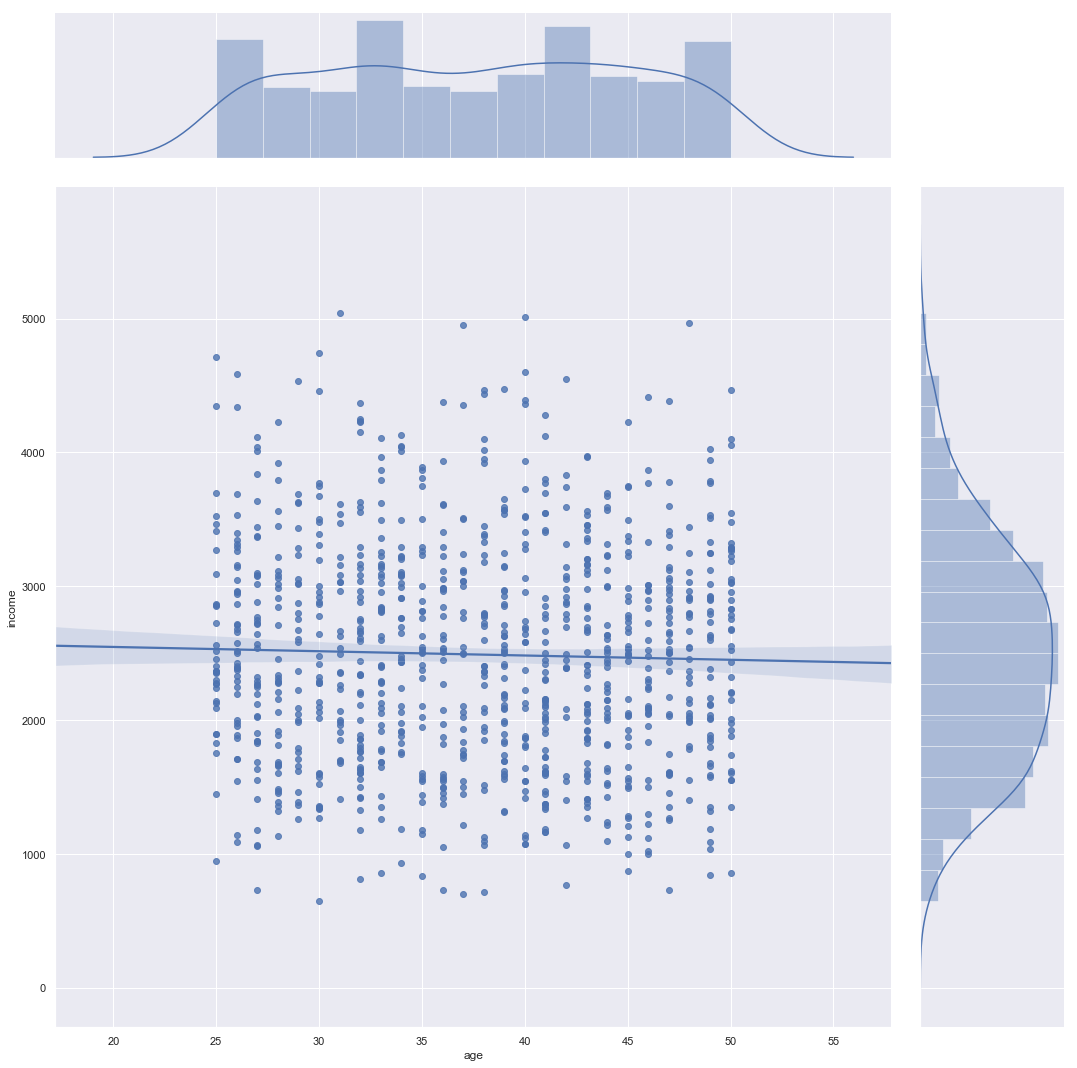

In [31]:
plt.figure(figsize = (15,21))
sns.jointplot(x="age", y="income", data=DF,size=15,kind = 'reg');